In [1]:
import numpy as np
from paos.classes.abcd import ABCD

In [2]:
# Propagation
thickness = 50.0  # mm
abcd = ABCD(thickness=thickness)
print(abcd.ABCD)
(A, B), (C, D) = abcd.ABCD
vt = np.array([0, 1])
vt = abcd() @ vt
print(vt)

[[ 1. 50.]
 [ 0.  1.]]
[50.  1.]


In [3]:
# Thin lens
radius = 20.0  # mm
abcd = ABCD(curvature=1.0 / radius)
print(abcd.ABCD)
vt = np.array([1, 0])
vt = abcd() @ vt
print(vt)
print(abcd.f_eff)

[[ 1.    0.  ]
 [-0.05  1.  ]]
[ 1.   -0.05]
20.0


In [4]:
# Dioptre
n1, n2 = 1.0, 1.25
radius = 20.0  # mm
abcd = ABCD(curvature=1.0 / radius, n1=n1, n2=n2)
print(abcd.ABCD)
vt = np.array([1, 1])
vt = abcd() @ vt
print(abcd.n1n2)
print(vt)

[[ 1.    0.  ]
 [-0.01  0.8 ]]
0.8
[1.   0.79]


In [5]:
# Thick lens
radius1, radius2 = 20.0, -20.0  # mm
n_os, n_l, n_is = 1.0, 2.403, 1.0
center_thickness = 3.0
abcd = ABCD(curvature=1.0 / radius1, n1=n_os, n2=n_l)
abcd = ABCD(thickness=center_thickness) * abcd
abcd = ABCD(curvature=1.0 / radius2, n1=n_l, n2=n_is) * abcd
print(abcd.ABCD)
print(abcd.f_eff)
print(abcd.M)
vt = np.array([1, 1])
vt = abcd() @ vt
print(vt)

[[ 0.91242197  1.24843945]
 [-0.1341564   0.91242197]]
7.453986464779647
1.0959841280700553
[2.16086142 0.77826557]


In [6]:
# Magnification
abcd = ABCD(M=2.0)
print(abcd.ABCD)
(A, B), (C, D) = abcd.ABCD
print((A * D - B * C) / D)
vt = np.array([1, 1])
vt = abcd() @ vt
print(vt)
print(abcd.M)

[[2.  0. ]
 [0.  0.5]]
2.0
[2.  0.5]
2.0


In [7]:
import numpy as np
from paos.classes.abcd import ABCD

thickness = 1.0  # mm
n = 1.0

theta_1 = np.deg2rad(45.0)
theta_2 = np.deg2rad(-45.0)
theta_3 = np.deg2rad(-45.0)
theta_4 = np.deg2rad(5.0)

A = np.cos(theta_2) * np.cos(theta_4) / (np.cos(theta_1) * np.cos(theta_3))
B = thickness * np.cos(theta_1) * np.cos(theta_4) / (np.cos(theta_2) * np.cos(theta_3)) / n
C = 0.0
D = 1.0 / A

abcdt = ABCD()
abcdt.ABCD = np.array([[A, B], [C, D]])

abcds = ABCD(thickness=thickness / n)

print(abcdt.ABCD)
print(abcds.ABCD)

print('           {:>10s}|{:>10s}|{:>10s}|{:>10s}'.format('power', 'M', 'Thickness', 'n1/n2'))
print("Tangential {:10.6f}|{:10.3f}|{:10.6f}|{:10.2f}".format(abcdt.power, abcdt.M, abcdt.thickness, abcdt.n1n2))
print("Sagittal   {:10.6f}|{:10.3f}|{:10.6f}|{:10.2f}".format(abcds.power, abcds.M, abcds.thickness, abcds.n1n2))

vt = np.array([1, 1])
vt = abcdt() @ vt
print(vt)

[[1.40883205 1.40883205]
 [0.         0.70980781]]
[[1. 1.]
 [0. 1.]]
                power|         M| Thickness|     n1/n2
Tangential  -0.000000|     1.409|  1.984808|      1.00
Sagittal    -0.000000|     1.000|  1.000000|      1.00
[2.81766411 0.70980781]


# WFO

In [8]:
from paos.classes.wfo import WFO

beam_diameter = 1.0  # m
wavelength = 3.0e-6
grid_size = 512
zoom = 4

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)

print('Pilot Gaussian beam properties\n')

print('Before lens\n')
print(f'Beam waist: {wfo.w0:.1e}')
print(f'Beam waist at current beam position: {wfo.wz:.1f}')
print(f'z-coordinate of the beam waist: {wfo.zw0:.1f}')
print(f'Rayleigh distance: {wfo.zr:.1e}')
print(f'Focal ratio: {wfo.fratio}')

fl = 1.0  # m
wfo.lens(lens_fl=fl)

print('\nAfter lens\n')
print(f'Beam waist: {wfo.w0:.1e}')
print(f'Beam waist at current beam position: {wfo.wz:.1f}')
print(f'z-coordinate of the beam waist: {wfo.zw0:.1f}')
print(f'Rayleigh distance: {wfo.zr:.1e}')
print(f'Focal ratio: {wfo.fratio:.1f}')
print(f'Distance to focus: {wfo.distancetofocus:.1f}')

wfo.propagate(dz=fl)

print('\nAfter propagation to lens focus\n')
print(f'Beam waist: {wfo.w0:.1e}')
print(f'Beam waist at current beam position: {wfo.wz:.1e}')
print(f'z-coordinate of the beam waist: {wfo.zw0:.1f}')
print(f'Rayleigh distance: {wfo.zr:.1e}')
print(f'Focal ratio: {wfo.fratio:.1f}')
print(f'Distance to focus: {wfo.distancetofocus:.1f}')

Pilot Gaussian beam properties

Before lens

Beam waist: 5.0e-01
Beam waist at current beam position: 0.5
z-coordinate of the beam waist: 0.0
Rayleigh distance: 2.6e+05
Focal ratio: inf

After lens

Beam waist: 1.9e-06
Beam waist at current beam position: 0.5
z-coordinate of the beam waist: 1.0
Rayleigh distance: 3.8e-06
Focal ratio: 1.0
Distance to focus: 1.0

After propagation to lens focus

Beam waist: 1.9e-06
Beam waist at current beam position: 1.9e-06
z-coordinate of the beam waist: 1.0
Rayleigh distance: 3.8e-06
Focal ratio: 1.0
Distance to focus: 0.0


In [9]:
from paos.classes.wfo import WFO

beam_diameter = 1.0  # m
wavelength = 3.0e-6
grid_size = 512
zoom = 4

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)

print('Before magnification\n')
print(f'Beam waist: {wfo.w0}')
print(f'Rayleigh distance: {wfo.zr:.2e}')

Ms, Mt = 1.0, 3.0
wfo.Magnification(Ms, Mt)

print('\nAfter magnification\n')
print(f'Beam waist: {wfo.w0}')
print(f'Rayleigh distance: {wfo.zr:.2e}')

2023-02-22 10:13:04,228 - paos - WARNING - Gaussian beam magnification is implemented, but has not been tested.


Before magnification

Beam waist: 0.5
Rayleigh distance: 2.62e+05

After magnification

Beam waist: 1.5
Rayleigh distance: 2.36e+06


In [10]:
from paos.classes.wfo import WFO

beam_diameter = 1.0  # m
wavelength = 3.0e-6
grid_size = 512
zoom = 4

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)
fl = 1.0  # m
wfo.lens(lens_fl=fl)

print('Before medium change\n')
print(f'Beam waist: {wfo.w0:.1e}')
# print(f'Rayleigh distance: {wfo.zr:.2e}')
print(f'Focal ratio: {wfo.fratio:.2f}')

n1, n2 = 1.0, 2.0
wfo.ChangeMedium(n1n2=n1 / n2)

print('\nAfter medium change\n')
print(f'Beam waist: {wfo.w0:.1e}')
# print(f'Rayleigh distance: {wfo.zr:.2e}')
print(f'Focal ratio: {wfo.fratio:.2f}')

Before medium change

Beam waist: 1.9e-06
Focal ratio: 1.00

After medium change

Beam waist: 1.9e-06
Focal ratio: 2.00


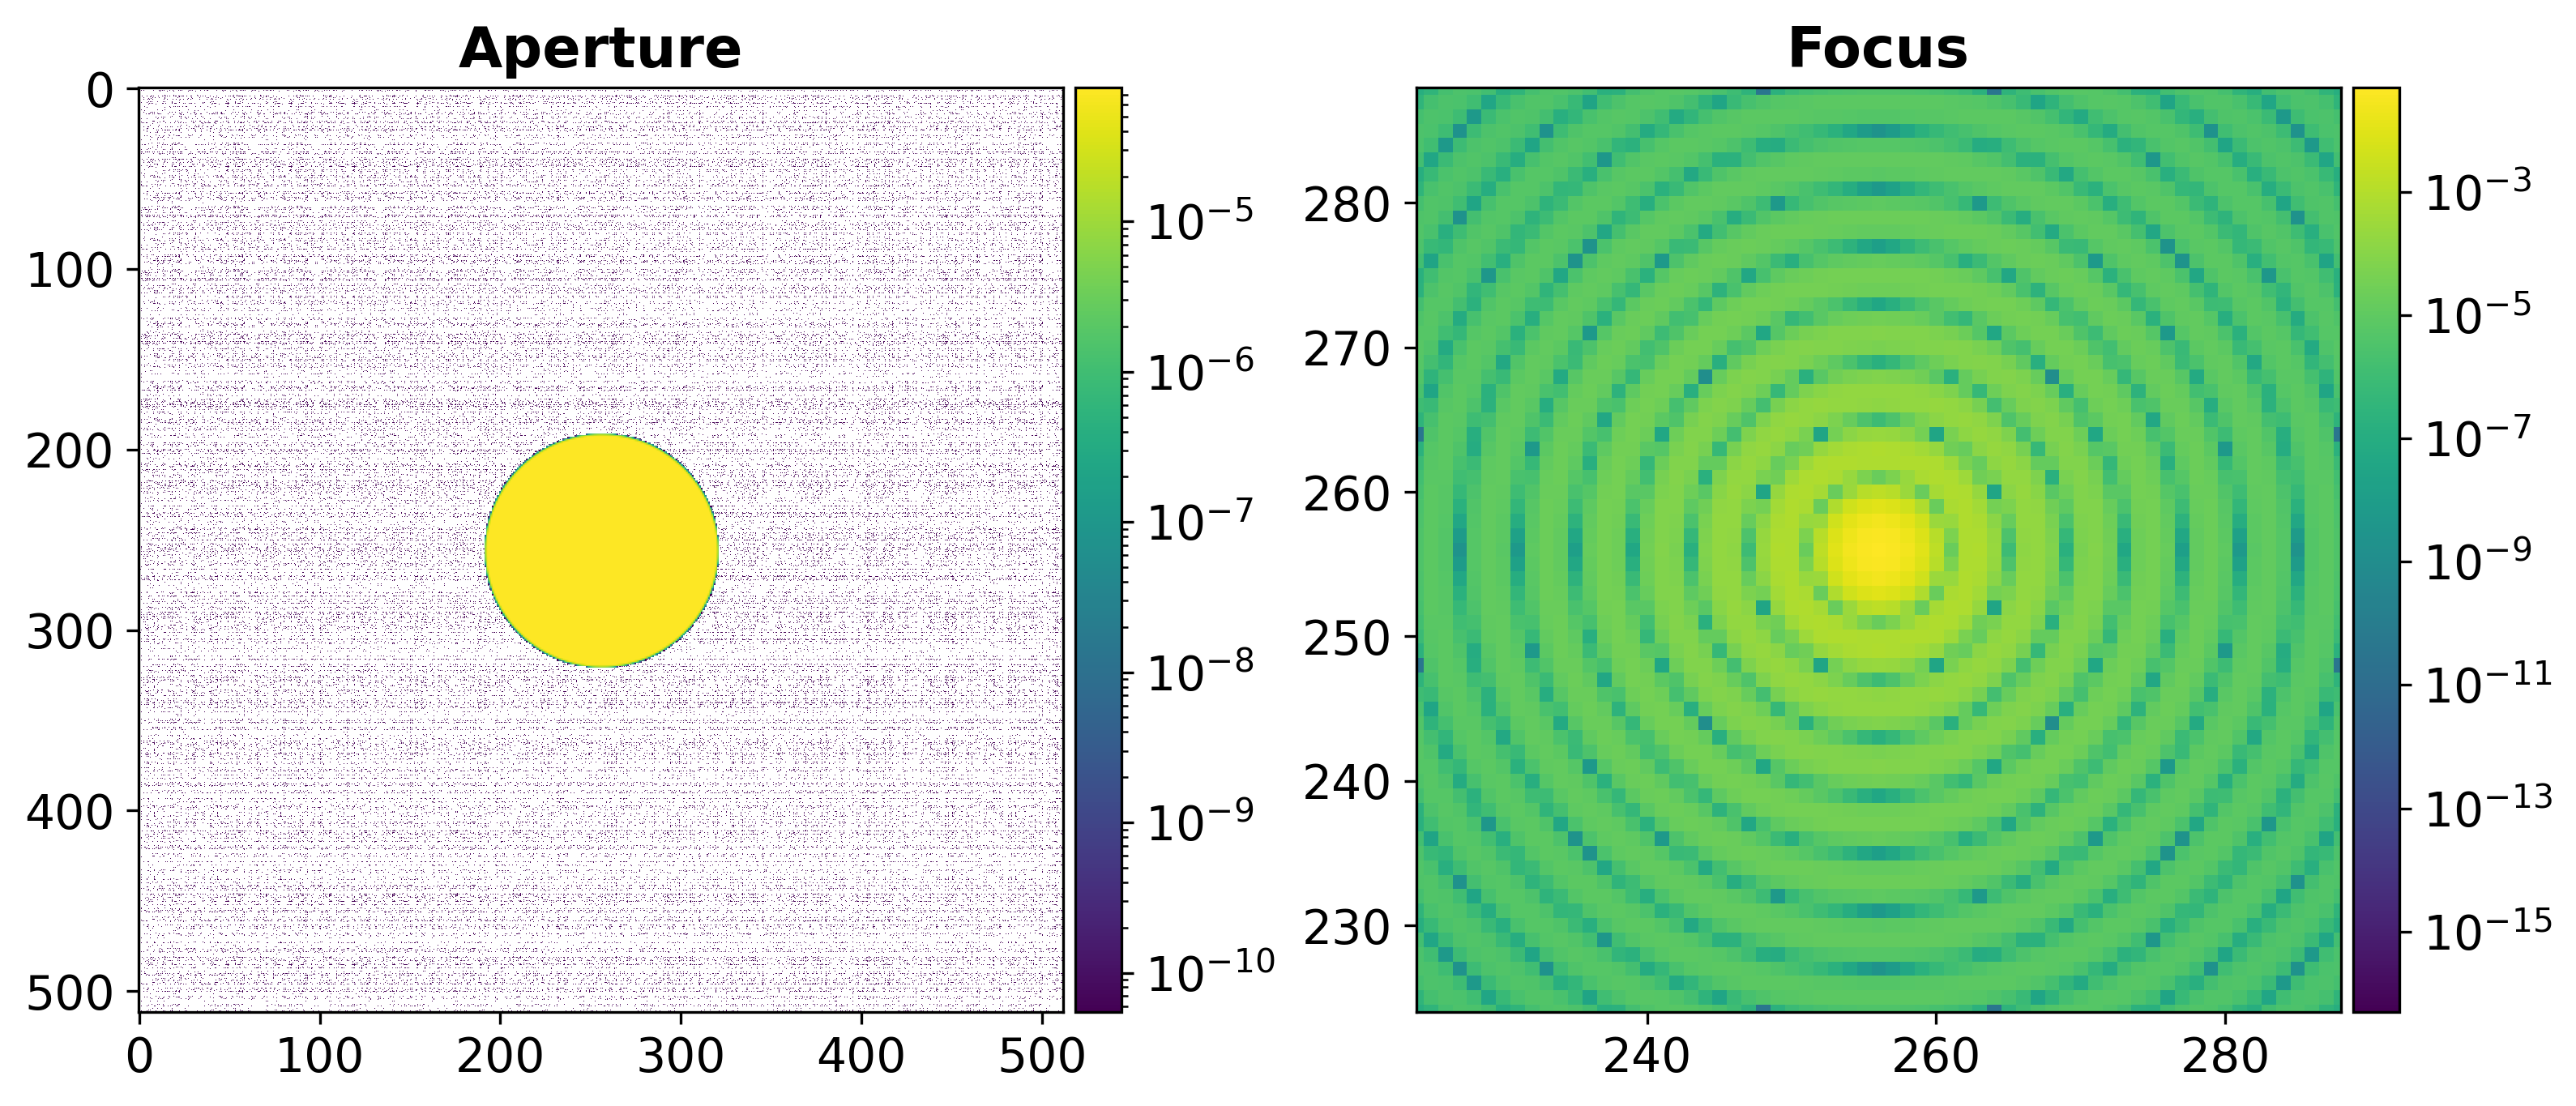

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from paos.classes.wfo import WFO

beam_diameter = 1.0  # m
wavelength = 3.0e-6
grid_size = 512
zoom = 4

fig = plt.figure(figsize=(12, 6), dpi=300)
plt.subplots_adjust(wspace=0.3)

ax0 = fig.add_subplot(1, 2, 1, aspect="equal")
ax1 = fig.add_subplot(1, 2, 2, aspect="equal")

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)
xdec = ydec = 0.0
wfo.aperture(xc=xdec, yc=ydec, r=beam_diameter / 2, shape='circular')
wfo.make_stop()
# Add colorbar to the plot, with the proper size
im0 = ax0.imshow(wfo.amplitude ** 2, norm=LogNorm())
divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)
ax0.set_title('Aperture')

fl = 1.0  # m
thickness = 1.0

wfo.lens(lens_fl=fl)
wfo.propagate(dz=thickness)
im1 = ax1.imshow(wfo.amplitude ** 2, norm=LogNorm())
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)
ax1.set_title('Focus')

zoomin = 8
shapex, shapey = wfo.amplitude.shape
ax1.set_xlim(shapex // 2 - shapex // 2 // zoomin, shapex // 2 + shapex // 2 // zoomin)
ax1.set_ylim(shapey // 2 - shapey // 2 // zoomin, shapey // 2 + shapey // 2 // zoomin)

plt.show()

In [12]:
import re


def plot_relative_index(self, material_list=None, ncols=2, figname=None, xscale=None, **kwargs):
    """
    Given a list of materials for optical use, plots the relative index in function of wavelength,
    at the reference and operating temperature.

    Parameters
    ----------
    material_list: list
        a list of materials, e.g. ['SF11', 'ZNSE']
    ncols: int
        number of columns for the subplots
    figname: str
        name of figure to save
    xscale: str
        scale of the x-axis, e.g. 'log'
    **kwargs: dict
        additional arguments for the plot

    Returns
    -------
    out: None
        displays the plot output or stores it to the indicated plot path

    Examples
    --------

    >>> from paos.util.material import Material
    >>> Material(wl = np.linspace(1.8, 8.0, 1024)).plot_relative_index(material_list=['Caf2', 'Sf11', 'Sapphire'])

    """
    i, j = None, None

    if material_list is None:
        material_list = []

    n_subplots = len(material_list)
    if ncols > n_subplots:
        ncols = n_subplots

    nrows = n_subplots // ncols
    if n_subplots % ncols:
        nrows += 1

    figsize = (8 * ncols, 6 * nrows)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.suptitle(r"Relative index of refraction vs ($\lambda$, T)", fontsize=24)
    fig.patch.set_facecolor('white')
    # plt.subplots_adjust(hspace=0.3, wspace=0.5)

    for k, name in enumerate(material_list):

        if n_subplots == 1:
            axis = ax
        elif n_subplots == 2:
            axis = ax[k]
        else:
            i = k % ncols
            j = k // ncols
            axis = ax[j, i]

        nmat0, nmat = self.nmat(name)

        axis.plot(self.wl, nmat0, '--', label=r"T$_{ref}$" + rf"$\,$ [{int(self.materials[name]['Tref'])}$^\circ$C]")
        axis.plot(self.wl, nmat, label=r"T$_{amb}$" + rf" [{int(self.Tambient)}$^\circ$C]")

        # if number in name, make it a subscript
        name = re.sub(r'(\d+)', r'$_\1$', name)
        axis.set_title(name, fontsize=18, fontweight='normal', fontstyle='italic')
        do_legend(axis=axis, ncol=1)
        axis.set_xlabel(r'Wavelength [$\mu$m]', fontsize=16, fontweight='normal')
        axis.set_ylabel('Relative index', fontsize=16, fontweight='normal')
        if xscale is not None:
            axis.set_xscale(xscale)
        axis.grid(lw=0.5, ls='--', alpha=0.8)

        if n_subplots % ncols and k == n_subplots - 1:
            for col in range(i + 1, ncols):
                ax[j, col].set_visible(False)

    if figname is not None:
        fig.savefig(figname, bbox_inches='tight', dpi=300)
        plt.close()
    else:
        fig.tight_layout()
        plt.show()

    return


def do_legend(axis, ncol=1):
    """
    Create a nice legend for the plots

    Parameters
    ----------
    axis: :class:`~matplotlib.axes.Axes`
        An instance of matplotlib axis
    ncol: int
        The number of legend columns

    Returns
    -------
    out: None
        Produces a nice matplotlib legend

    """
    legend = axis.legend(loc='best', ncol=ncol, frameon=True, prop={'size': 14})
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_alpha(0.8)
    return

In [29]:
from paos.util.material import Material

mat = Material(wl=np.linspace(0.5, 8.0, 100))
plot_relative_index(mat, material_list=['CAF2', 'ZNSE'], figname='figures/relative_index.pdf')

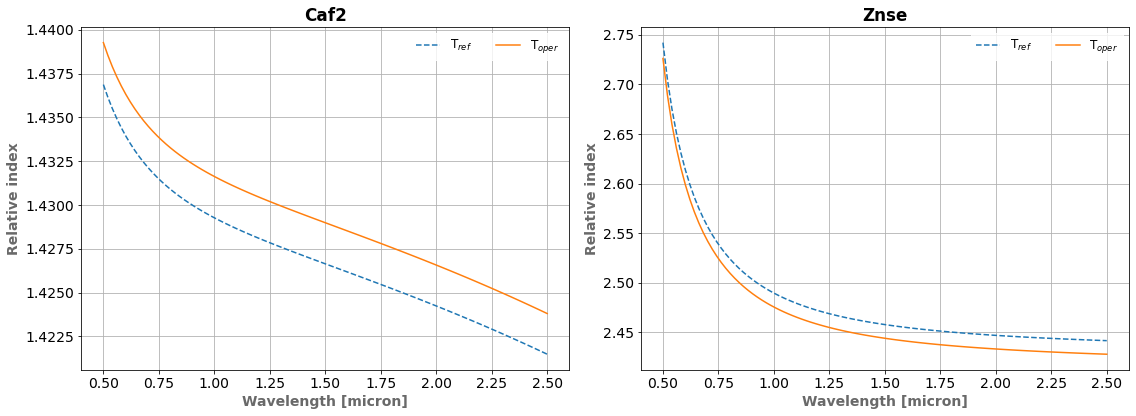

In [30]:
from paos.util.material import Material
mat = Material(wl=np.linspace(0.5, 2.5, 100), Tambient=-223, Pambient=1.0)
mat.plot_relative_index(material_list=['Caf2', 'Znse'])

## Zernike

In [14]:
from paos.core.plot import simple_plot
from paos.core.run import push_results
from paos.classes.abcd import ABCD
import matplotlib.pyplot as plt

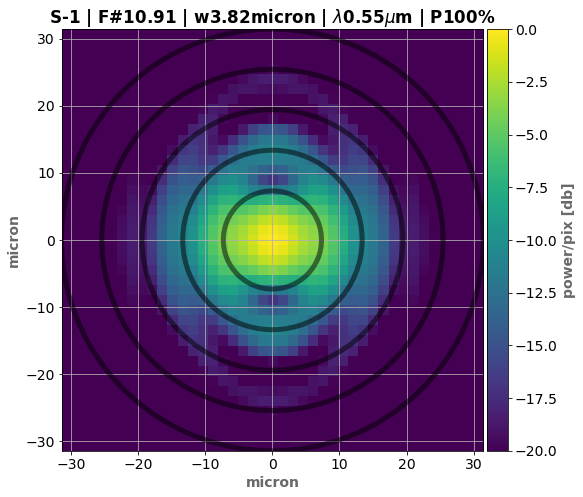

In [15]:
import numpy as np
from paos.classes.wfo import WFO
wfo = WFO(beam_diameter=1.1, wl=0.55e-6, grid_size=512, zoom=4)
wfo.aperture(xc=0.0, yc=0.0, hx=0.55, hy=0.365, shape='elliptical')
wfo.make_stop()
Z_index = np.array([0, 1, 2, 3,         4, 5])
Z_value = np.array([0, 0, 0, 0, 2 * 50e-9, 0])  # defocus with SFE of 50 nm RMS
wfo.zernikes(index=Z_index, Z=Z_value, ordering='ansi', normalize='False', radius=wfo.wz, origin='x')
wfo.lens(lens_fl=12)
wfo.propagate(dz=12)

retval = {-1: push_results(wfo)}
retval[-1]['aperture'] = None
retval[-1]['ABCDt'] = ABCD

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
simple_plot(fig, ax, key=-1, item=retval[-1], ima_scale='log')
plt.show()

In [16]:
import numpy as np
from paos.util.material import Material

mat = Material(wl=np.array([0.5, 1.5, 2.5]))
material = mat.materials["BK7"]
sellmeier = mat.sellmeier(material["sellmeier"])
print(["{:0.4f}".format(x) for x in sellmeier])
sellmeier

['1.5214', '1.5013', '1.4860']


array([1.52141448, 1.50127406, 1.48601771])

In [17]:
from paos.util.material import Material

wl = 1.95  # micron
Tref, Tambient = 20.0, -223.0
material = Material(wl, Tambient=Tambient)
n_sap_ref, n_sap_amb = \
    material.nmat(name="SAPPHIRE")  # n_sap_ref = 1.7392, n_sap_amb = 1.7367
print(f"n_sap_ref = {n_sap_ref:.4f}, n_sap_amb = {n_sap_amb:.4f}")

n_sap_ref = 1.7392, n_sap_amb = 1.7367


In [18]:
from paos.util.material import Material

wl = 1.95  # micron
Tref, Tamb = 20.0, -223.0  # Celsius
Pamb = 1.0  # atm
material = Material(wl, Tambient=Tamb, Pambient=Pamb)
n_sap_ref, n_sap_amb = material.nmat(name="SAPPHIRE")
print(f"n_sap_ref = {n_sap_ref:.4f}, n_sap_amb = {n_sap_amb:.4f}")
material.Tambient = -223.0
material.Pambient = 0.0
n_sap_ref, n_sap_amb = material.nmat(name="SAPPHIRE")
print(f"n_sap_ref = {n_sap_ref:.4f}, n_sap_amb = {n_sap_amb:.4f}")

n_sap_ref = 1.7392, n_sap_amb = 1.7367
n_sap_ref = 1.7388, n_sap_amb = 1.7362
